In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation


In [5]:
book = pd.read_csv('book (1).csv', encoding="ISO-8859-1")
book.head()

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


In [6]:
book = book.drop('Unnamed: 0', axis=1)
book = book.rename(columns={'User.ID':'userid' , 'Book.Title':'title' ,'Book.Rating':'rating'} )
book.head()



,userid,title,rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6


Descriptive Statistics

In [7]:

book.shape

(10000, 3)

In [8]:

#number of unique users in the dataset
len(book.userid.unique())

2182

In [9]:

book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userid  10000 non-null  int64 
 1   title   10000 non-null  object
 2   rating  10000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 234.5+ KB


In [10]:

book.rating.describe()
#no use of getting mean, median of userids

count    10000.00000
mean         7.56630
std          1.82152
min          1.00000
25%          7.00000
50%          8.00000
75%          9.00000
max         10.00000
Name: rating, dtype: float64

In [11]:

book.isna().sum()


userid    0
title     0
rating    0
dtype: int64

In [12]:

book[book.index.duplicated()]

,userid,title,rating


In [13]:

#Average rating given to books
book.groupby('title')['rating'].agg('mean')

title
 Jason, Madison &amp                                                       8.0
 Other Stories;Merril;1985;McClelland &amp                                 6.0
 Repairing PC Drives &amp                                                  4.0
'48                                                                        7.0
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities      8.0
                                                                          ... 
\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character    8.0
\Well, there's your problem\: Cartoons                                     9.0
iI Paradiso Degli Orchi                                                    7.0
stardust                                                                   5.0
Ã?Â?bermorgen.                                                             4.0
Name: rating, Length: 9659, dtype: float64

In [14]:

#Number of times rating given to a book
book.groupby('title')['rating'].count()

title
 Jason, Madison &amp                                                       1
 Other Stories;Merril;1985;McClelland &amp                                 1
 Repairing PC Drives &amp                                                  1
'48                                                                        1
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities      1
                                                                          ..
\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character    1
\Well, there's your problem\: Cartoons                                     1
iI Paradiso Degli Orchi                                                    1
stardust                                                                   1
Ã?Â?bermorgen.                                                             1
Name: rating, Length: 9659, dtype: int64

In [15]:

a = pd.array(book.groupby('title')['rating'].count())
b=pd.array(book.groupby('title')['rating'].agg('mean'))

In [16]:

ratings = pd.DataFrame(book.groupby('title')['rating'].agg('mean')).iloc[:,1:]
ratings['Avg_rating'] = b
ratings['No_times_rated'] = a
ratings

,Avg_rating,No_times_rated
title,,
"Jason, Madison &amp",8.0,1
Other Stories;Merril;1985;McClelland &amp,6.0,1
Repairing PC Drives &amp,4.0,1
'48,7.0,1
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,8.0,1
...,...,...
"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character",8.0,1
"\Well, there's your problem\: Cartoons",9.0,1
iI Paradiso Degli Orchi,7.0,1


Data Visualisation

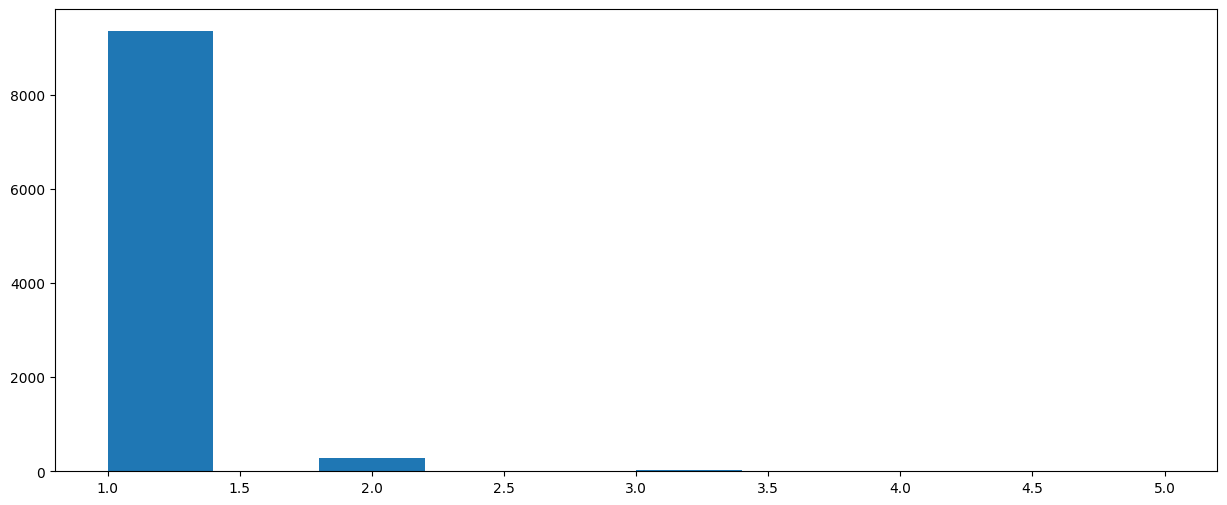

In [17]:



plt.figure(figsize=(15,6))
plt.hist(ratings.No_times_rated)
plt.show()

# Most of the observations are rated only once



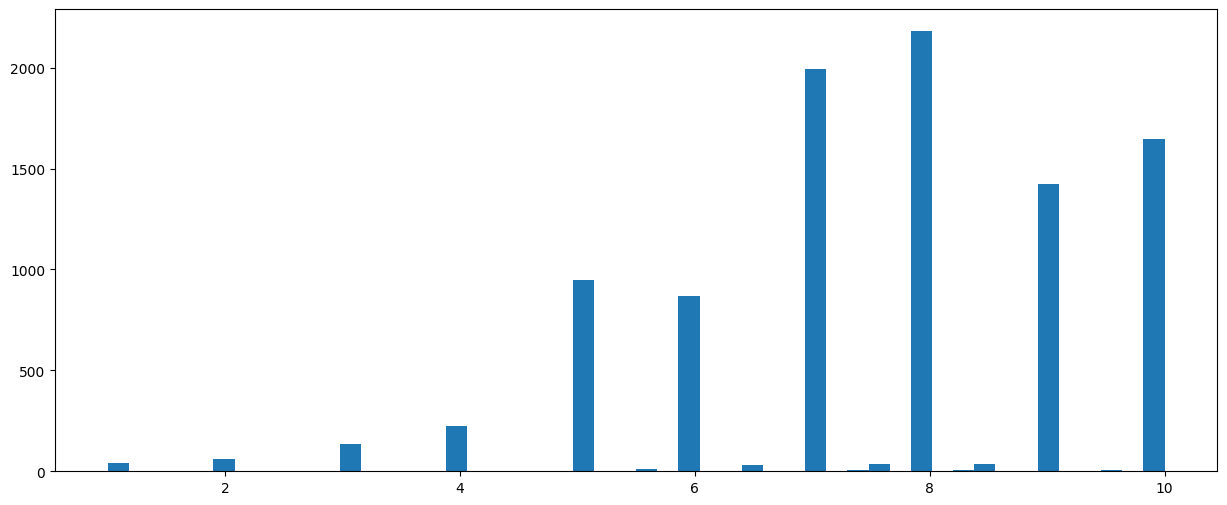

In [18]:

plt.figure(figsize=(15,6))
plt.hist(ratings.Avg_rating, bins=50)
plt.show()

# Most of the ratings are 7, 8, 9, 10



Collaborative Recommender System Using Cosine Similarity

In [19]:

user_book_df = book.pivot_table(index='userid' , columns='title', values='rating').fillna(0)
user_book_df


title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
userid,,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0


In [20]:

#Calculating Cosine Similarity between Users
user_sim = 1 - pairwise_distances(user_book_df.values,metric='cosine')

In [21]:

#Store the results in a dataframe
user_sim_df = pd.DataFrame(user_sim)
user_sim_df


,0,1,2,3,4,5,6,7,8,9,...,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [22]:
#Set the index and column names to user ids
user_sim_df.index = list(user_book_df.index)
user_sim_df.columns = list(user_book_df.index)

user_sim_df


,8,9,10,12,14,16,17,19,22,26,...,278831,278832,278836,278843,278844,278846,278849,278851,278852,278854
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
278852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [23]:

np.fill_diagonal(user_sim, 0)
user_sim_df

,8,9,10,12,14,16,17,19,22,26,...,278831,278832,278836,278843,278844,278846,278849,278851,278852,278854
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:

#finding users with high similarity between them
user = []
user1 = []
similar = []

for cols in user_sim_df.columns:
    for rows in user_sim_df.index:
        if user_sim_df[cols][rows] > 0.01 :
            user.append(cols)
            user1.append(rows)
            similar.append(user_sim_df[cols][rows])


In [25]:

similar_users = pd.DataFrame()

similar_users['user'] = user
similar_users['user1'] = user1
similar_users['similarity'] = similar


In [26]:

similar_users

,user,user1,similarity
0,19,278418,0.087046
1,51,3757,0.043541
2,53,1996,0.125429
3,53,276847,0.062225
4,82,882,0.174928
...,...,...,...
693,278843,277585,0.077712
694,278843,277959,0.080630
695,278844,161373,0.195515
696,278844,276813,0.228717


In [27]:

similar_users.sort_values(by=['similarity'], ascending=False).head(25)

,user,user1,similarity
297,3951,276934,1.000000
120,1559,1326,1.000000
44,698,161645,1.000000
45,705,162063,1.000000
68,933,162004,1.000000
615,278110,278131,1.000000
223,2576,160926,1.000000
616,278131,278110,1.000000
384,161645,698,1.000000
519,277284,2355,1.000000


In [28]:

book[(book['userid']==3951) | (book['userid']==276934)] # similarity = 1

,userid,title,rating
265,276934,The Wind in the Willows,10
7792,3951,The Wind in the Willows,7


In [29]:

book[(book['userid']==160926) | (book['userid']==1348)] #similarity = 0.752577


,userid,title,rating
3915,1348,Fantastic Beasts and Where to Find Them,7
3916,1348,Stardust,8
8350,160926,Stardust,8


Here, we will recommend 'Fantastic Beasts and Where to Find Them' to userid 160926 since user similar to him/her have watched(liked) it